<a href="https://colab.research.google.com/github/siddartharaj06/Python-For-Data-Science/blob/main/Lab_1_4th_Aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Permutations using Recursion in Python

# Recursive factorial function
def factorial(n, steps=[]):
    if n == 0 or n == 1:
        steps.append(f"{n}! = 1")
        return 1
    else:
        result = n * factorial(n - 1, steps)
        steps.append(f"{n}! = {n} × ({n-1}!) = {result}")
        return result

# Function to compute permutations nPr
def permutation(n, r):
    if n < r:
        return None, None, "Invalid input! n must be greater than or equal to r."

    steps_factorial_n = []
    steps_factorial_nr = []

    fact_n = factorial(n, steps_factorial_n)
    fact_nr = factorial(n - r, steps_factorial_nr)

    npr = fact_n // fact_nr

    breakdown = "\n".join(steps_factorial_n) + "\n" + "-"*40 + "\n" + "\n".join(steps_factorial_nr)

    return npr, breakdown, None

# Seating arrangement simulation (optional)
def seating_arrangement(n, r):
    import itertools
    people = [f"P{i+1}" for i in range(n)]
    arrangements = list(itertools.permutations(people, r))
    return arrangements

# ----------- MAIN PROGRAM -----------

# Example test cases
test_cases = [(5,3), (6,2)]

for n, r in test_cases:
    print(f"\n--- Calculating {n}P{r} ---")
    result, steps, error = permutation(n, r)
    if error:
        print(error)
    else:
        print("Step-by-step Factorial Breakdown:\n")
        print(steps)
        print("\nFinal Result:")
        print(f"{n}P{r} = {result}")

        # Show seating arrangement (only first 5 for brevity)
        print("\nSample Seating Arrangements:")
        arrangements = seating_arrangement(n, r)
        for i, arr in enumerate(arrangements[:5], 1):
            print(f"{i}. {arr}")
        print(f"... Total {len(arrangements)} arrangements.\n")



--- Calculating 5P3 ---
Step-by-step Factorial Breakdown:

1! = 1
2! = 2 × (1!) = 2
3! = 3 × (2!) = 6
4! = 4 × (3!) = 24
5! = 5 × (4!) = 120
----------------------------------------
1! = 1
2! = 2 × (1!) = 2

Final Result:
5P3 = 60

Sample Seating Arrangements:
1. ('P1', 'P2', 'P3')
2. ('P1', 'P2', 'P4')
3. ('P1', 'P2', 'P5')
4. ('P1', 'P3', 'P2')
5. ('P1', 'P3', 'P4')
... Total 60 arrangements.


--- Calculating 6P2 ---
Step-by-step Factorial Breakdown:

1! = 1
2! = 2 × (1!) = 2
3! = 3 × (2!) = 6
4! = 4 × (3!) = 24
5! = 5 × (4!) = 120
6! = 6 × (5!) = 720
----------------------------------------
1! = 1
2! = 2 × (1!) = 2
3! = 3 × (2!) = 6
4! = 4 × (3!) = 24

Final Result:
6P2 = 30

Sample Seating Arrangements:
1. ('P1', 'P2')
2. ('P1', 'P3')
3. ('P1', 'P4')
4. ('P1', 'P5')
5. ('P1', 'P6')
... Total 30 arrangements.



=== Large Factorials – Performance Limitations ===
Maximum Recursion Depth: 1000 


---- Testing 5! ----
Recursive Result (5!): Computed Successfully (Length: 3 digits)
Iterative Result (5!): Computed Successfully (Length: 3 digits)

---- Testing 50! ----
Recursive Result (50!): Computed Successfully (Length: 65 digits)
Iterative Result (50!): Computed Successfully (Length: 65 digits)

---- Testing 200! ----
Recursive Result (200!): Computed Successfully (Length: 375 digits)
Iterative Result (200!): Computed Successfully (Length: 375 digits)

---- Testing 998! ----
Recursive approach failed: maximum recursion depth exceeded
Iterative Result (998!): Computed Successfully (Length: 2562 digits)

---- Testing 1200! ----
Recursive approach failed: maximum recursion depth exceeded
Iterative Result (1200!): Computed Successfully (Length: 3176 digits)

 Plotting factorial growth for n=1 to 20...


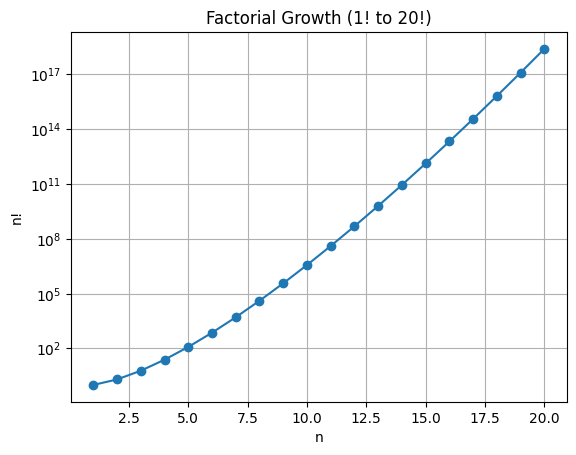

In [4]:
# Large Factorials – Performance Limitations

import sys
import matplotlib.pyplot as plt

# Recursive factorial function with error handling
def recursive_factorial(n, steps=False):
    if n < 0:
        raise ValueError("Factorial is not defined for negative numbers.")
    if n == 0 or n == 1:
        return 1
    return n * recursive_factorial(n - 1)

# Iterative factorial function (safer for large n)
def iterative_factorial(n):
    if n < 0:
        raise ValueError("Factorial is not defined for negative numbers.")
    result = 1
    for i in range(2, n + 1):
        result *= i
    return result

# Main program
def main():
    print("=== Large Factorials – Performance Limitations ===")
    print("Maximum Recursion Depth:", sys.getrecursionlimit(), "\n")

    test_values = [5, 50, 200, 998, 1200]  # includes beyond safe recursion depth

    for n in test_values:
        print(f"\n---- Testing {n}! ----")

        # Check recursion limit
        if n > 998:
            print(f" Warning: {n} is greater than Python's safe recursion depth (998). Recursion may fail.")

        # Try recursive approach
        try:
            rec_result = recursive_factorial(n)
            print(f"Recursive Result ({n}!): Computed Successfully (Length: {len(str(rec_result))} digits)")
        except (RecursionError, OverflowError) as e:
            print(f"Recursive approach failed: {e}")

        # Iterative approach (always works until memory runs out)
        try:
            iter_result = iterative_factorial(n)
            print(f"Iterative Result ({n}!): Computed Successfully (Length: {len(str(iter_result))} digits)")
        except OverflowError as e:
            print(f"Iterative approach failed: {e}")

    # Optional: Plot factorial growth
    print("\n Plotting factorial growth for n=1 to 20...")
    x = list(range(1, 21))
    y = [iterative_factorial(i) for i in x]
    plt.plot(x, y, marker="o")
    plt.title("Factorial Growth (1! to 20!)")
    plt.xlabel("n")
    plt.ylabel("n!")
    plt.yscale("log")  # log scale since values grow very fast
    plt.grid(True)
    plt.show()

main()
